# Load Data

## 표고(시설)

In [1]:
import os
import pandas as pd
import numpy as np


def load_data(path):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    use_cols = ['age1',
                'land',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2',# catecorical variable
                'cony'] # dependent variable

    dataframe_list = []

    # 2014
    print('-'*10)
    ## 노지
    file_path1 = os.path.join(path, str(years[4])+'년', str(years[4])+'년 임산물생산비조사_통합 데이터_5. 표고(원목_시설)(엑셀1).xlsx')
    file_path2 = os.path.join(path, str(years[4])+'년', str(years[4])+'년 임산물생산비조사_통합 데이터_5. 표고(원목_시설)(엑셀2).xlsx')

    forest_data1 = pd.read_excel(file_path1)
    forest_data2 = pd.read_excel(file_path2)
    forest_2014 = pd.concat([forest_data1, forest_data2], axis=1)

    dataframe_list.append(forest_2014.loc[:,use_cols])
    print(2014, forest_2014.shape, '시설')
    
    # 2015-2016
    for year in years[5:7]:
        print('-'*10)
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_시설(엑셀1).xlsx')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_시설(엑셀2).xlsx')

        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)

        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape, '시설')

    
    # 2017-2018
    for year in years[7:9]:
        print('-'*10)
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_시설(엑셀 1).xls')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_시설(엑셀 2).xls')

        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)

        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape, '시설')


    # 2019
    print('-'*10)
    file_path = os.path.join(path, str(years[9])+'년', str(years[9])+'년 임산물생산비조사_통합 데이터_5. 표고시설.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_2019.loc[:,use_cols])
    print(2019, forest_2019.shape, '시설')
    

    data = pd.concat(dataframe_list, axis=0)
    data = data.reset_index(drop=True)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

----------
2014 (147, 389) 시설
----------
2015 (150, 390) 시설
----------
2016 (137, 389) 시설
----------
2017 (144, 389) 시설
----------
2018 (109, 389) 시설
----------
2019 (105, 405) 시설


In [2]:
data

,age1,land,labch,labh_hour,lab_cost,fmtc,lansh,size,ara,de2,cony
0,62,17558972,1.153964e+07,937.692308,15001528,4.510959e+07,3.846154e+05,2,31,2,3669.230769
1,55,17558972,1.161644e+07,945.384615,15101368,3.581418e+07,1.538462e+06,2,31,2,3680.769231
2,60,17558972,9.744024e+06,794.000000,9744024,3.465235e+07,5.000000e+05,2,31,2,3550.000000
3,64,17558972,1.150237e+07,935.384615,14953084,3.481373e+07,3.846154e+05,2,31,2,3492.307692
4,69,17558972,6.076195e+06,500.909091,13367630,2.732237e+07,4.545455e+05,3,31,1,1868.181818
...,...,...,...,...,...,...,...,...,...,...,...
787,47,18185698,1.931719e+06,127.252252,8576834,2.650339e+07,1.409894e+05,3,36,1,1288.513514
788,66,18293913,1.826943e+06,147.517730,5151980,2.225724e+07,2.969216e+05,3,37,2,3318.085106
789,82,18293913,1.125919e+07,1225.925926,24319857,3.069437e+07,2.953125e+05,3,37,1,2355.555556
790,71,18293913,7.461814e+05,64.460784,3044420,2.144490e+07,1.474081e+05,3,37,2,542.401961


In [3]:
print((data['cony'] == 0).sum())
data.drop(data[data['cony'] == 0].index, inplace=True)
print(data.shape)

0
(792, 11)


In [4]:
data.isnull().sum()

age1         0
land         0
labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [5]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

age1         0
land         0
labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [6]:
for column in data.columns:
    if len(data[column].value_counts()) <= 10:
        print(data[column].value_counts())
        print()

2    268
1    267
3    257
Name: size, dtype: int64

34    250
37    161
36    121
31     94
33     94
99     72
Name: ara, dtype: int64

2    566
1    226
Name: de2, dtype: int64



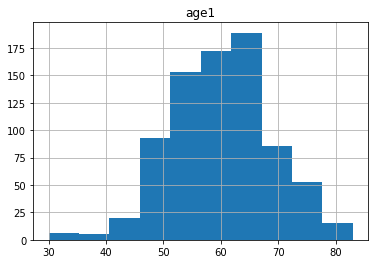

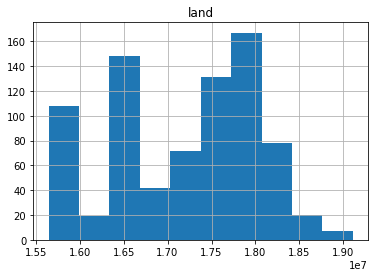

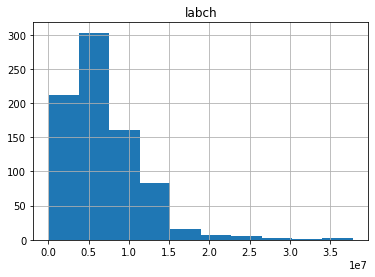

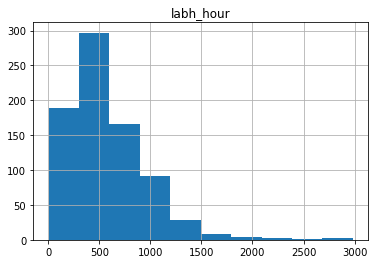

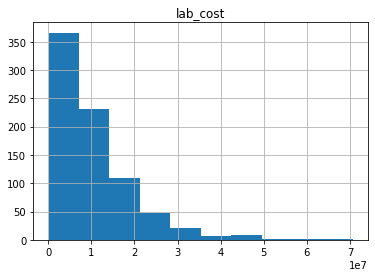

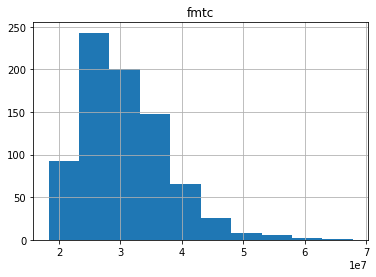

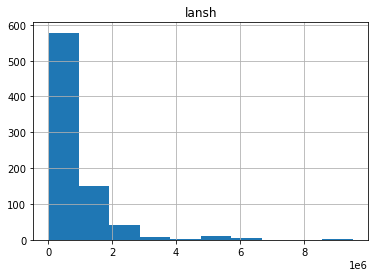

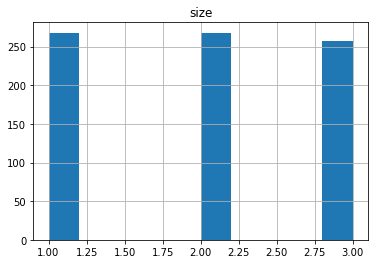

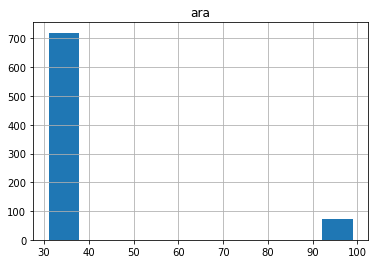

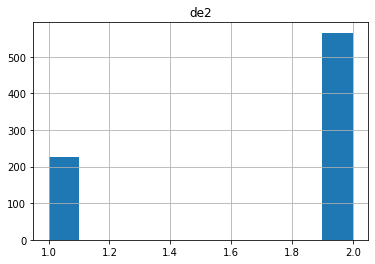

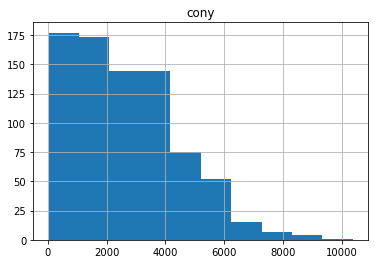

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Log Transform

In [8]:
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [9]:
data['cony'] = np.log1p(data['cony'])

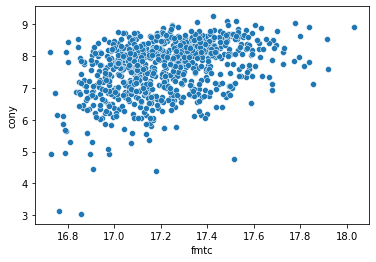

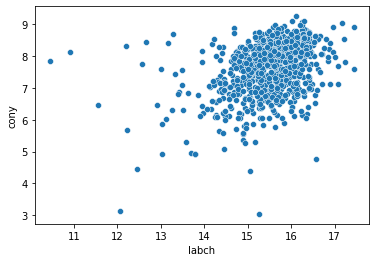

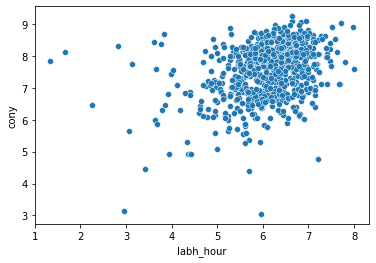

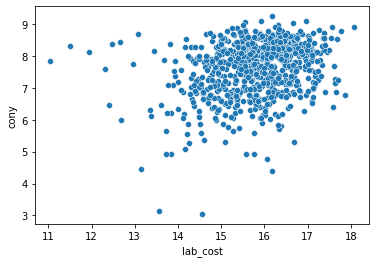

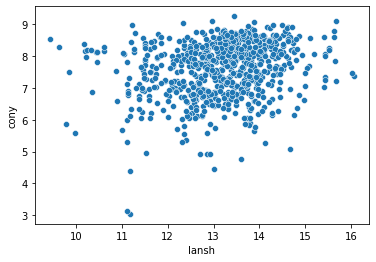

In [10]:
import seaborn as sns

sns.scatterplot(x='fmtc', y='cony', data=data)
plt.show()

sns.scatterplot(x='labch', y='cony', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='cony', data=data)
plt.show()

sns.scatterplot(x='lab_cost', y='cony', data=data)
plt.show()

sns.scatterplot(x='lansh', y='cony', data=data)
plt.show()

## NaN Check

In [11]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [12]:
data.isnull().sum()

age1         0
land         0
labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [13]:
data.dropna(axis=0, inplace=True)

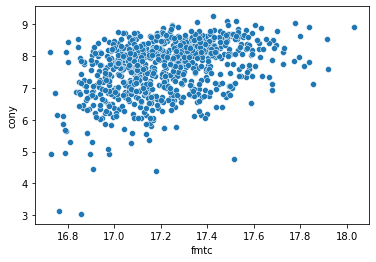

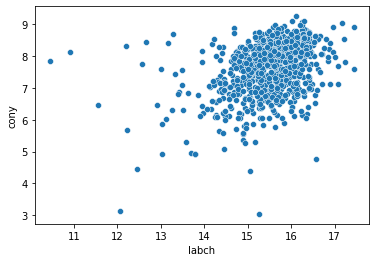

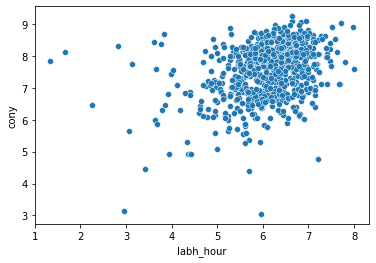

In [14]:
sns.scatterplot(x='fmtc', y='cony', data=data)
plt.show()

sns.scatterplot(x='labch', y='cony', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='cony', data=data)
plt.show()

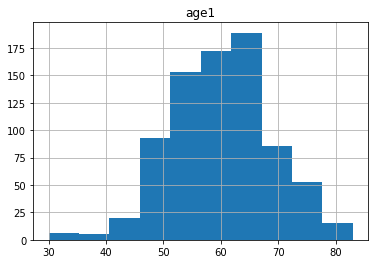

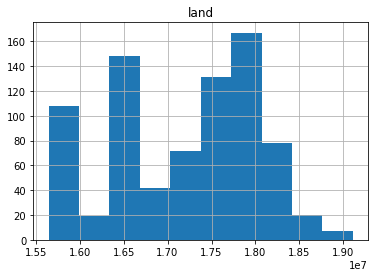

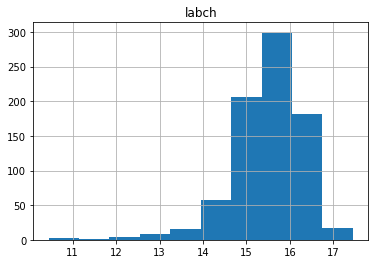

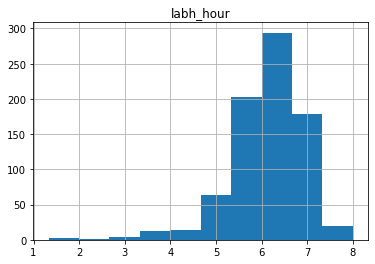

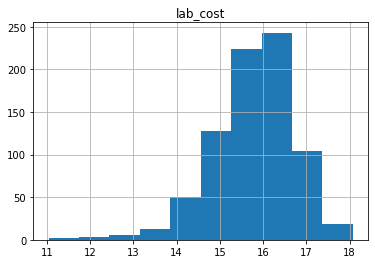

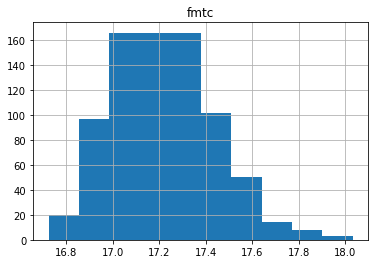

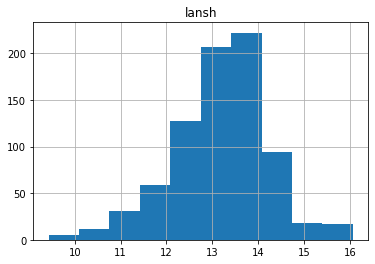

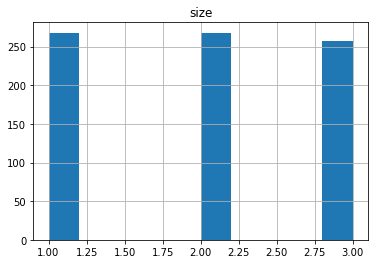

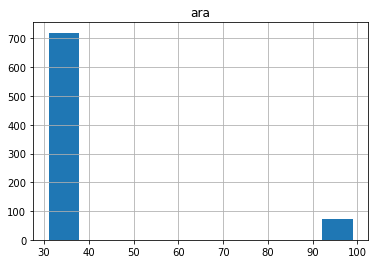

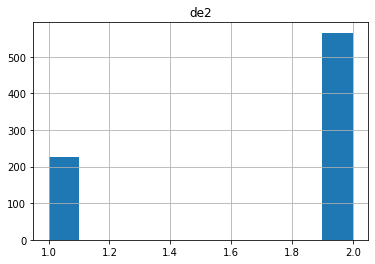

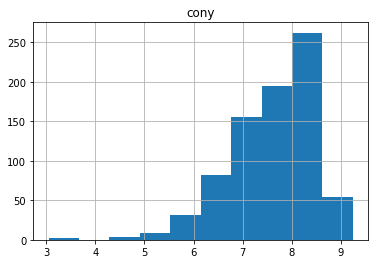

In [15]:
for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Categorical Variable processing

In [16]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara', 'de2']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, categorical_variables])
onehot = onehot_encoder.fit_transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3]), array([31, 33, 34, 36, 37, 99]), array([1, 2])]
(792, 11)


## Numerical Variable processing

In [17]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['age1',
                       'land',
                       'labch', 'labh_hour', 'lab_cost',
                       'fmtc', 'lansh']
X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, numerical_variables])
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.60377358, 0.5524366 , 0.83047785, ..., 0.77974179, 0.68875506,
        0.51695249],
       [0.47169811, 0.5524366 , 0.83142541, ..., 0.78068422, 0.51251325,
        0.72564119],
       [0.56603774, 0.5524366 , 0.80631697, ..., 0.7184362 , 0.48732513,
        0.556448  ],
       ...,
       [0.98113208, 0.76471232, 0.82696331, ..., 0.84838466, 0.39468986,
        0.47717919],
       [0.77358491, 0.76471232, 0.43927042, ..., 0.55315271, 0.12080589,
        0.37258199],
       [0.45283019, 0.86003177, 0.68666677, ..., 0.73409311, 0.45920577,
        0.54591817]])

In [18]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,land,labch,labh_hour,lab_cost,fmtc,lansh,0,1,2,3,4,5,6,7,8,9,10
0,0.603774,0.552437,0.830478,0.826642,0.779742,0.688755,0.516952,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.471698,0.552437,0.831425,0.827865,0.780684,0.512513,0.725641,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.566038,0.552437,0.806317,0.801740,0.718436,0.487325,0.556448,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.641509,0.552437,0.830016,0.826273,0.779282,0.490874,0.516952,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.735849,0.552437,0.738852,0.732807,0.763358,0.305807,0.542100,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.320755,0.733456,0.575150,0.528307,0.700309,0.282563,0.365880,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
788,0.679245,0.764712,0.567183,0.550295,0.627895,0.149204,0.477997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
789,0.981132,0.764712,0.826963,0.866777,0.848385,0.394690,0.477179,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
790,0.773585,0.764712,0.439270,0.427506,0.553153,0.120806,0.372582,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
X_data = np.array(X_data_df)
y_data = np.array(data['cony'])

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 18) (712,)
(80, 18) (80,)


# Modeling

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [22]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[7.04725254 6.74875955 7.65207075 8.06650258 8.51278348 8.75628555
 8.77854969 7.51896908 6.9789735  6.04263283]


In [23]:
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_rmse

0.9036007691080139

## RandomForest

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 3000, max_features = 'sqrt', 
                           random_state = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=3000, random_state=1000)

In [25]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[7.60663463 7.04300824 6.94094315 8.09852141 8.3805259  8.11930551
 8.19980562 6.98460547 7.34663645 6.50516483]


In [26]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_rmse

0.6309915006643427

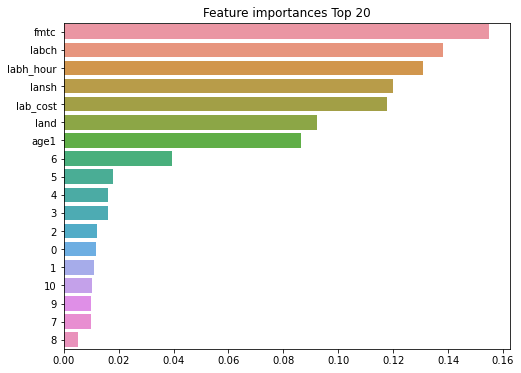

In [27]:
import seaborn as sns

importances_values = rf.feature_importances_ 
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## Ridge

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1724)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1724)

In [29]:
print(ridge.score(X_train, y_train))

0.2765316221867169


In [30]:
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_rmse

0.7213571512663435

## LASSO

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [32]:
print(lasso.score(X_train, y_train))

0.2745496820779555


In [33]:
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_rmse

0.7222040673805119

## GBM

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=8)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[7.51668457 7.01529366 6.57840061 8.048487   8.37652547 8.47023895
 8.56405251 6.69976005 7.22727804 6.51546176]


In [35]:
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_rmse

0.732596041330662

## AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 500, learning_rate = 0.1)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[7.57080386 6.76814178 7.18276242 7.61787691 7.79011347 7.72941242
 7.69115708 7.00279774 7.64479977 7.17993115]


In [37]:
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
ada_rmse

0.786910172721733

## XGBoost

In [38]:
import xgboost as xgb
print(xgb.__version__)

xgb_reg = xgb.XGBRegressor(learning_rate=0.08, max_depth=8, 
                           gamma=0, n_estimators=3000,
                           subsample=0.7, colsample_bytree=0.8)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

1.3.3
[7.766585  7.0277505 6.3985987 8.064375  8.633941  8.467353  8.438524
 6.3689213 7.5340652 6.1601777]


In [39]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_rmse

0.6859238608269511

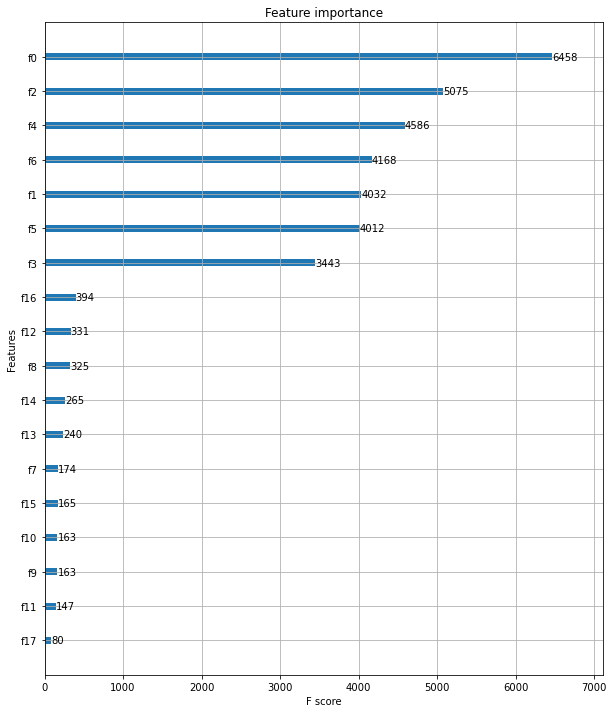

In [40]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [41]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=50, num_leaves=10, min_data_in_leaf=10)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(max_depth=50, min_data_in_leaf=10, n_estimators=1000,
              num_leaves=10)

In [42]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[7.5864493  7.15701698 6.1327655  8.11101296 8.5198177  8.52187263
 8.65415324 6.68877053 7.23019513 6.19845049]


In [43]:
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_rmse

0.6595586811348004

# Model Comparison

In [44]:
model_result = pd.DataFrame({
    'Model': ['Decision Tree', 'RandomForest', 'Ridge', 'LASSO',
              'GBM', 'AdaBoost', 'XGboost', 'LightGBM'],
    'RMSE': [dt_rmse, rf_rmse, ridge_rmse, lasso_rmse,
             gbm_rmse, ada_rmse, xgb_rmse, lgb_rmse]})
model_result.sort_values(by='RMSE', ascending=True)

,Model,RMSE
1,RandomForest,0.630992
7,LightGBM,0.659559
6,XGboost,0.685924
2,Ridge,0.721357
3,LASSO,0.722204
4,GBM,0.732596
5,AdaBoost,0.786910
0,Decision Tree,0.903601


# Ensemble

In [45]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
    def predict(self, X_test):
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)
            
        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights)
        result['RMSE'] = np.sqrt(mse)

        return result.sort_values('RMSE', ascending=True)

In [46]:
models = {'RandomForest' : rf, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,0,1,RMSE
2479,0.725545,0.274455,0.626091
26434,0.724744,0.275256,0.626092
10832,0.726401,0.273599,0.626092
6497,0.724522,0.275478,0.626092
4523,0.726550,0.273450,0.626092
6635,0.724374,0.275626,0.626092
25221,0.724309,0.275691,0.626092
8007,0.726781,0.273219,0.626092
12191,0.724148,0.275852,0.626092
21881,0.724002,0.275998,0.626092


In [47]:
optimal_weight = np.round(result.iloc[0,:-1], 3).tolist()
print(optimal_weight)

[0.726, 0.274]


In [48]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[7.60110385 7.07424663 6.71950247 8.1019441  8.41869185 8.2296089
 8.32429687 6.9035467  7.31473153 6.4211251 ]


In [49]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

0.6260914818083962

# Evaluation

In [50]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[1999.40282531 1180.15332313  827.40525337 3299.87906508 4529.97240419
 3749.36671075 4121.83727888  994.80026371 1501.26842558  613.69431678]
[ 668.57142857 1206.34146341  778.57142857 3360.         5717.
 4745.83333333 7241.66666667  673.17073171  722.64150943  213.33333333]


In [51]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

1533.6661775477437

In [52]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,668.6,1999.4
1,1206.3,1180.2
2,778.6,827.4
3,3360.0,3299.9
4,5717.0,4530.0
5,4745.8,3749.4
6,7241.7,4121.8
7,673.2,994.8
8,722.6,1501.3
9,213.3,613.7


# 2018-2019 Prediction

In [53]:
import os
import pandas as pd
import numpy as np


def load_data(path, year):
    use_cols = ['age1',
                'land',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2',# catecorical variable
                'cony'] # dependent variable
    
    # 2018
    if year == 2018:
        file_path1 = os.path.join(path, '2018년/2018년 임산물생산비조사_통합 데이터_5. 표고_시설(엑셀 1).xls')
        file_path2 = os.path.join(path, '2018년/2018년 임산물생산비조사_통합 데이터_5. 표고_시설(엑셀 2).xls')
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_2018 = pd.concat([forest_data1, forest_data2], axis=1)
        data = forest_2018.loc[:,use_cols]
        print(2018, data.shape)
        
    elif year == 2019:
        file_path = os.path.join(path, '2019년/2019년 임산물생산비조사_통합 데이터_5. 표고시설.xlsx')
        forest_2019 = pd.read_excel(file_path).loc[:,use_cols]
        data = forest_2019
        print(2019, data.shape)
    else:
        print('year must be in 2018, 2019')
    
    return data

In [67]:
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)', 2019)

2019 (105, 11)


In [68]:
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [69]:
data['cony'] = np.log1p(data['cony'])

In [70]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [71]:
if data.isnull().sum().sum() > 0:
    print(data.isnull().sum().sum())
    data.fillna(data.mean(), inplace=True)

In [72]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara', 'de2']
onehot = onehot_encoder.transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3]), array([31, 33, 34, 36, 37, 99]), array([1, 2])]
(105, 11)


In [73]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.49056604, 1.        , 0.81445343, 0.78245176, 0.62804881,
        0.63878886, 0.70169406],
       [0.41509434, 1.        , 0.8307751 , 0.79989735, 0.69208667,
        0.60227001, 0.63331177],
       [0.69811321, 0.39578361, 0.74404294, 0.73253497, 0.5580201 ,
        0.57815358, 0.67424789],
       [0.66037736, 0.39578361, 0.71385251, 0.69537988, 0.52799339,
        0.27552568, 0.56990354],
       [0.67924528, 0.39578361, 0.63111448, 0.59713318, 0.44570401,
        0.34914787, 0.67424789],
       [0.64150943, 0.69704668, 0.82521712, 0.80426382, 0.70553047,
        0.49128555, 0.74963319],
       [1.        , 0.69704668, 0.61224729, 0.59275344, 0.49011837,
        0.41911279, 0.90447879],
       [0.77358491, 0.69704668, 0.9020221 , 0.90666242, 0.71514264,
        0.76817574, 0.31176521],
       [0.58490566, 0.69704668, 0.85422861, 0.84106325, 0.73438465,
        0.53055305, 0.23914151],
       [0.73584906, 0.69704668, 0.88894798, 0.88323548, 0.72804297,
        0.64694547, 0.3

In [74]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,land,labch,labh_hour,lab_cost,fmtc,lansh,0,1,2,3,4,5,6,7,8,9,10
0,0.490566,1.000000,0.814453,0.782452,0.628049,0.638789,0.701694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.415094,1.000000,0.830775,0.799897,0.692087,0.602270,0.633312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.698113,0.395784,0.744043,0.732535,0.558020,0.578154,0.674248,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.660377,0.395784,0.713853,0.695380,0.527993,0.275526,0.569904,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.679245,0.395784,0.631114,0.597133,0.445704,0.349148,0.674248,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.320755,0.733456,0.575150,0.528307,0.700309,0.282563,0.365880,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
101,0.679245,0.764712,0.567183,0.550295,0.627895,0.149204,0.477997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
102,0.981132,0.764712,0.826963,0.866777,0.848385,0.394690,0.477179,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
103,0.773585,0.764712,0.439270,0.427506,0.553153,0.120806,0.372582,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [75]:
X_test = np.array(X_data_df)
y_test = np.array(data['cony'])

In [76]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[8.59643685 8.55785525 8.40867627 8.36625412 7.90863537 7.10245632
 7.83976007 7.86973274 8.09044855 7.76896924]


In [77]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[5411.34018936 5206.5003771  4484.81858755 4298.50045269 2719.67521683
 1213.94771455 2538.59544219 2615.86611697 3262.15092406 2365.03121588]
[5848.         5928.57142857 5768.         6106.         4002.
  533.75       3002.56410256 3856.         3306.25       1800.        ]


In [78]:
print(np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred)))

941.7952556193013


In [79]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,5848.0,5411.3
1,5928.6,5206.5
2,5768.0,4484.8
3,6106.0,4298.5
4,4002.0,2719.7
5,533.8,1213.9
6,3002.6,2538.6
7,3856.0,2615.9
8,3306.3,3262.2
9,1800.0,2365.0


# Prediction

In [87]:
def prediction(file_path):
    use_cols = ['fno',
                'age1',
                'land', 
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2']
    
    
    data = pd.read_csv(file_path).loc[:,use_cols]
    
    # log transform
    data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
    data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])
    
    # data imputation
    data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan},},
              inplace=True)
    if data.isnull().sum().sum() > 0:
        print(data.isnull().sum())
        data.fillna(data.mean(), inplace=True)
        
    # enconding
    onehot = onehot_encoder.transform(data.loc[:, categorical_variables])
    X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
    numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
    onehot_data_df = pd.DataFrame(onehot.toarray())

    X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
    X_test = np.array(X_data_df)
    
    # predict and inverse transform
    preds = ensemble.predict(X_test)
    inverse_transformed_pred = np.expm1(preds)
    inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
    
    result = pd.DataFrame({'prediction' : inverse_transformed_pred}, index=data.fno)
    
    return result

In [88]:
file_path = './(수정)임산물생산비 마이크로데이터(2020)/(수정)2020년_임산물생산비조사_5.표고시설.csv'
prediction = prediction(file_path)
prediction

,prediction
fno,
12001,4367.830881
12002,4249.901694
12003,5198.652135
14051,1716.875864
14053,2151.071766
...,...
29182,3664.711671
29216,4439.261212
29225,2103.335778


In [89]:
prediction.to_csv('prediction/2020년_임산물생산비조사_5.표고시설_예측값.csv')